# STOCK PRICE PREDICTION

SHAIKH RIDA NISAR

Importing libraries

In [1]:
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
os.getcwd()

'C:\\Users\\hp\\Desktop\\ML Rida\\Projects\\Stock Price Prediction'

Loading dataset

In [3]:
INFOSYS= pd.read_csv("INFOSYS.csv")

In [4]:
INFOSYS.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-01,494.5,502.500000,493.000000,498.700012,415.561249,6880852.0
1,2015-07-02,499.5,500.700012,492.524994,494.000000,411.644745,4007568.0
2,2015-07-03,494.0,496.500000,491.000000,495.149994,412.603058,2695306.0
3,2015-07-06,492.5,494.000000,487.500000,491.649994,409.686493,4305602.0
4,2015-07-07,492.5,495.000000,489.500000,490.250000,408.519897,3497418.0


In [5]:
INFOSYS.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1223,2020-06-23,695.700012,724.500000,692.099976,720.650024,720.650024,12157390.0
1224,2020-06-24,716.900024,726.799988,709.400024,714.150024,714.150024,10220838.0
1225,2020-06-25,704.849976,705.599976,693.500000,700.500000,700.500000,14945284.0
1226,2020-06-26,710.200012,751.599976,710.000000,748.200012,748.200012,26030458.0
1227,2020-06-29,735.400024,744.700012,730.099976,731.750000,731.750000,8954428.0


In [6]:
INFOSYS = INFOSYS.dropna()

Displaying first five records

In [7]:
INFOSYS = INFOSYS[['Date','Open', 'High', 'Low','Close','Adj Close','Volume']]
INFOSYS.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-01,494.5,502.500000,493.000000,498.700012,415.561249,6880852.0
1,2015-07-02,499.5,500.700012,492.524994,494.000000,411.644745,4007568.0
2,2015-07-03,494.0,496.500000,491.000000,495.149994,412.603058,2695306.0
3,2015-07-06,492.5,494.000000,487.500000,491.649994,409.686493,4305602.0
4,2015-07-07,492.5,495.000000,489.500000,490.250000,408.519897,3497418.0


In [8]:
INFOSYS.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1227.000000,1227.000000,1227.000000,1227.000000,1227.000000,1.227000e+03
mean,605.359984,611.994194,598.518723,605.161715,557.417386,8.675740e+06
std,103.981567,105.130168,103.068678,104.111674,118.345056,7.941786e+06
min,440.000000,443.799988,430.000000,436.700012,390.604187,7.589560e+05
25%,514.187500,519.762482,509.349991,513.974976,451.269745,5.361510e+06
50%,586.025024,592.450012,580.000000,585.950012,517.107422,7.023516e+06
75%,704.924988,711.725006,695.975006,704.262512,676.590088,9.551616e+06
max,843.299988,847.000000,835.049988,840.150024,810.035217,1.644050e+08


In [9]:
INFOSYS.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1227 entries, 0 to 1227
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1227 non-null   object 
 1   Open       1227 non-null   float64
 2   High       1227 non-null   float64
 3   Low        1227 non-null   float64
 4   Close      1227 non-null   float64
 5   Adj Close  1227 non-null   float64
 6   Volume     1227 non-null   float64
dtypes: float64(6), object(1)
memory usage: 76.7+ KB


We use Plotly, a powerful visualization library in Python. Plotly allows users to create interactive plots and charts for data visualization purposes. Here Plotly used for offline plotting and sets up the necessary modules for creating engaging visualizations.

In [10]:
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

Data visualisation using Plotly

In [11]:
layout = go.Layout(
    title='STOCK PRICE OF INFOSYS',
        xaxis=dict(
            title='date',
            titlefont=dict(
                family='Courier New, monospace',
                size=18,
                color='blue'
            )
        ),
        yaxis=dict(
            title='Price',
            titlefont=dict(
                family='Courier New, monospace',
                size=18,
                color='red'
        )
    )
)
INFOSYS_DATA = [{'x':INFOSYS['Date'], 'y':INFOSYS['Close']}]
plot = go.Figure(data=INFOSYS_DATA, layout=layout)

In [12]:
iplot(plot)

In [13]:
INFOSYS['Open-Close']= INFOSYS.Close - INFOSYS.Open
INFOSYS['High-Low']  = INFOSYS.High - INFOSYS.Low
INFOSYS = INFOSYS.dropna()
X= INFOSYS[['Open-Close', 'High-Low']]
X.head()

,Open-Close,High-Low
0,4.200012,9.500000
1,-5.500000,8.175018
2,1.149994,5.500000
3,-0.850006,6.500000
4,-2.250000,5.500000


In [14]:
Y= np.where(INFOSYS['Close'].shift(-1)>INFOSYS['Close'],1,-1)

Data splitting

In [15]:
split_percentage = 0.8
split = int(split_percentage*len(INFOSYS))

X_train = X[:split]
Y_train = Y[:split]

X_test = X[split:]
Y_test = Y[split:]

Using Random Forest Classifier Model

In [16]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [17]:
scores = []

for num_trees in range(1,41):
    clf = RandomForestClassifier(n_estimators = num_trees)
    scores.append(cross_val_score(clf, X, Y, cv=10))

In [18]:
print(scores[0])

[0.48780488 0.5203252  0.4796748  0.4796748  0.55284553 0.49593496
 0.41463415 0.51639344 0.47540984 0.39344262]


In [19]:
print(scores[1])

[0.47154472 0.46341463 0.48780488 0.51219512 0.50406504 0.44715447
 0.41463415 0.46721311 0.45901639 0.45081967]


In [20]:
rfc = RandomForestClassifier(n_estimators=16)

In [21]:
rfc.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=16)

In [22]:
rfc_pred = rfc.predict(X_test)

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

In [24]:
print(classification_report(Y_test, rfc_pred))

              precision    recall  f1-score   support

          -1       0.43      0.48      0.46       116
           1       0.49      0.44      0.46       130

    accuracy                           0.46       246
   macro avg       0.46      0.46      0.46       246
weighted avg       0.46      0.46      0.46       246



In [25]:
print(confusion_matrix(Y_test, rfc_pred))

[[56 60]
 [73 57]]


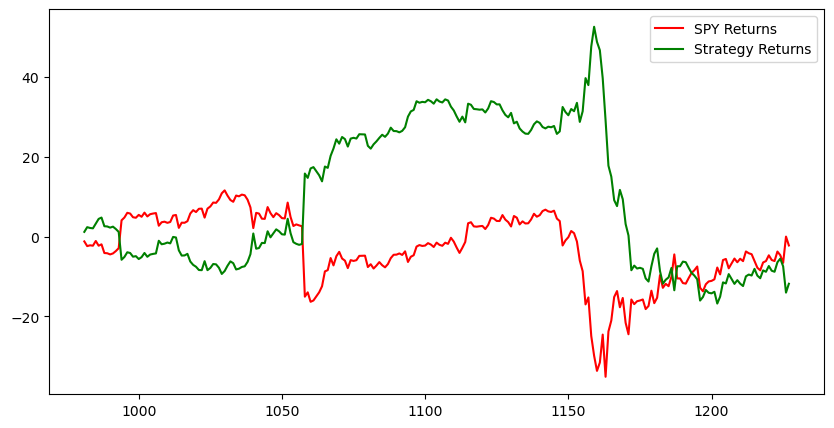

In [26]:
INFOSYS['Predicted_Signal'] = rfc.predict(X)

INFOSYS['SPY_returns'] = np.log(INFOSYS['Close']/INFOSYS['Close'].shift(1))
Cumulative_SPY_returns = INFOSYS[split:]['SPY_returns'].cumsum()*100
 
INFOSYS['Startegy_returns'] = INFOSYS['SPY_returns']* INFOSYS['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = INFOSYS[split:]['Startegy_returns'].cumsum()*100

plt.figure(figsize=(10,5))
plt.plot(Cumulative_SPY_returns, color='r',label = 'SPY Returns')
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
plt.legend()
plt.show()

In [27]:
model = rfc.fit(X_train, Y_train)
model = rfc.fit (X_train,Y_train)

In [28]:
probability = model.predict_proba(X_test)
print(probability)

[[0.625  0.375 ]
 [0.75   0.25  ]
 [0.     1.    ]
 [0.0625 0.9375]
 [0.6875 0.3125]
 [0.5625 0.4375]
 [0.125  0.875 ]
 [0.8125 0.1875]
 [0.25   0.75  ]
 [0.1875 0.8125]
 [0.875  0.125 ]
 [0.75   0.25  ]
 [0.5    0.5   ]
 [0.375  0.625 ]
 [0.3125 0.6875]
 [0.3125 0.6875]
 [0.4375 0.5625]
 [0.6875 0.3125]
 [0.875  0.125 ]
 [0.875  0.125 ]
 [0.4375 0.5625]
 [0.3125 0.6875]
 [0.125  0.875 ]
 [0.0625 0.9375]
 [0.4375 0.5625]
 [0.875  0.125 ]
 [0.875  0.125 ]
 [0.375  0.625 ]
 [0.5    0.5   ]
 [0.625  0.375 ]
 [0.125  0.875 ]
 [0.6875 0.3125]
 [0.1875 0.8125]
 [0.6875 0.3125]
 [0.875  0.125 ]
 [0.1875 0.8125]
 [0.5    0.5   ]
 [0.5625 0.4375]
 [0.     1.    ]
 [0.6875 0.3125]
 [0.8125 0.1875]
 [0.8125 0.1875]
 [0.5    0.5   ]
 [0.1875 0.8125]
 [0.375  0.625 ]
 [0.5    0.5   ]
 [0.875  0.125 ]
 [0.4375 0.5625]
 [0.125  0.875 ]
 [0.6875 0.3125]
 [0.5    0.5   ]
 [0.     1.    ]
 [0.5625 0.4375]
 [0.75   0.25  ]
 [0.4375 0.5625]
 [0.375  0.625 ]
 [0.5625 0.4375]
 [0.6875 0.3125]
 [1.     0.   

In [29]:
predicted = rfc.predict(X_test)

In [30]:
from sklearn import metrics

In [31]:
print(metrics.confusion_matrix(Y_test, predicted))

[[61 55]
 [73 57]]


In [32]:
print(metrics.classification_report(Y_test, predicted))

              precision    recall  f1-score   support

          -1       0.46      0.53      0.49       116
           1       0.51      0.44      0.47       130

    accuracy                           0.48       246
   macro avg       0.48      0.48      0.48       246
weighted avg       0.48      0.48      0.48       246



In [33]:
print(model.score(X_train,Y_train))

0.9877675840978594


ACCURACY OF TRAINING MODEL FOR INFOSYS STOCK MARKET PRICE PREDICTION IS ABOUT 98%